# Лабораторная работа №2
## Методы оценки статических характеристик, связанных с распределением пользователей на плоскости

**Задание 1.** Сгенерировать выборку случайных чисел размером 100 и 1000 для двух
распределений – экспоненциального и нормального. Для созданных выборок сделать
следующее:
1. Посчитать выборочное среднее и дисперсию, сравнить с математическим
ожиданием соответствующих распределений;
2. Посчитать 0.5 и 0.99 квантили, сравнить с соответствующими теоретическими
значениями;
3. Построить гистограмму распределения;
4. Построить функцию распределения случайной величины на основе выборки (на
одном графике показать функции распределения, полученные из выборок
разного размера и теоретическую);
5. Построить плотность распределения случайной величины на основе выборки (на
одном графике показать плотности распределения, полученные из выборок
разного размера и теоретическую).

---
Подготовка функций и импорт библиотек

---

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import special

In [4]:
# Определение функции распределения
def cdf(rnd_list):
    cdf_x = []
    cdf_y = []
    l = sorted(rnd_list)
    N = len(l)
    for i in range(0, N):
        count = 0
        for j in range(0, N):
            if l[i] > l[j]:
                count += 1
        cdf_x.append(l[i])
        cdf_y.append(count/N)
    return {'x': cdf_x, 'y': cdf_y}

In [5]:
# Определение плотности распределения
def pdf(k, rnd_list):
    pdf_x = []  
    pdf_y = []
    n = len(rnd_list)
    h = (max(rnd_list) - min(rnd_list)) / k
    a = min(rnd_list)
    for i in range(0, k):
        count = 0
        for j in rnd_list:
            if (a + i * h) < j < (a + (i * h) + h):
                count = count + 1
        pdf_x.append(a + i * h + h / 2)
        pdf_y.append(count / (n * h))
    d = {'x': pdf_x, 'y': pdf_y}
    return d

In [6]:
def cdf_exp(x, exp_lambda):
    return 1 - math.e**(-exp_lambda * x)

In [7]:
def cdf_norm(x, mean, std):
    return (1.0/2.0) * (1 + math.erf((x - mean)/(std * math.sqrt(2))))

In [8]:
def pdf_exp(x, exp_lambda):
    return exp_lambda * (math.e**(-exp_lambda*x))

In [9]:
def pdf_norm(x, mean, std):
    tmp1 = 1.0 / (std  * math.sqrt(2 * math.pi))
    tmp2 = ((x - mean) /std)**2
    tmp3 = -0.5 * tmp2
    return tmp1 * math.e**(tmp3)

---
Генерация данных

---

In [10]:
exp_lambda = 2.0
distrib_exp_100 = np.random.exponential(scale = 1.0/exp_lambda, size = 100)
distrib_exp_1000 = np.random.exponential(scale = 1.0/exp_lambda, size = 1000)

In [11]:
norm_mean = 5
norm_std = 3.0
distrib_norm_100 = np.random.normal(norm_mean, norm_std, size = 100)
distrib_norm_1000 = np.random.normal(norm_mean, norm_std, size = 1000)

---
Выборочное среднее, дисперсия.

---

In [12]:
m_e = np.mean(distrib_exp_100)
d_e = np.var(distrib_exp_100)
theor_m_e = 1.0/exp_lambda
theor_d_e = 1.0/(exp_lambda**2)
print("Экспоненциальное распределение (100 элементов): \n"
"Mξ_выборочное = {}, Dξ_выборочное = {}\n"
"Mξ_теоретическое = {}, Dξ_теоретическое = {}\n".format(m_e, d_e, theor_m_e, theor_d_e))
print("Разница между выборочным значением и теоретическим: \n |Mξ| = {}, |Dξ| = {}"
      .format(abs(theor_m_e - m_e), abs(theor_d_e - d_e)))

Экспоненциальное распределение (100 элементов): 
Mξ_выборочное = 0.549588945475076, Dξ_выборочное = 0.4102355214721494
Mξ_теоретическое = 0.5, Dξ_теоретическое = 0.25

Разница между выборочным значением и теоретическим: 
 |Mξ| = 0.049588945475075974, |Dξ| = 0.16023552147214942


In [13]:
m_e = np.mean(distrib_exp_1000)
d_e = np.var(distrib_exp_1000)
print("Экспоненциальное распределение (1000 элементов): \n"
"Mξ_выборочное = {}, Dξ_выборочное = {}\n"
"Mξ_теоретическое = {}, Dξ_теоретическое = {}\n".format(m_e, d_e, theor_m_e, theor_d_e))
print("Разница между выборочным значением и теоретическим: \n |Mξ| = {}, |Dξ| = {}"
      .format(abs(theor_m_e - m_e), abs(theor_d_e - d_e)))

Экспоненциальное распределение (1000 элементов): 
Mξ_выборочное = 0.5116556234262106, Dξ_выборочное = 0.2679942125526354
Mξ_теоретическое = 0.5, Dξ_теоретическое = 0.25

Разница между выборочным значением и теоретическим: 
 |Mξ| = 0.011655623426210626, |Dξ| = 0.01799421255263539


In [14]:
m_e = np.mean(distrib_norm_100)
d_e = np.var(distrib_norm_100)
theor_m_e = norm_mean
theor_d_e = norm_std ** 2
print("Нормальное распределение (100 элементов): \n"
"Mξ_выборочное = {}, Dξ_выборочное = {}\n"
"Mξ_теоретическое = {}, Dξ_теоретическое = {}\n".format(m_e, d_e, theor_m_e, theor_d_e))
print("Разница между выборочным значением и теоретическим: \n |Mξ| = {}, |Dξ| = {}"
      .format(abs(theor_m_e - m_e), abs(theor_d_e - d_e)))

Нормальное распределение (100 элементов): 
Mξ_выборочное = 4.798902924371927, Dξ_выборочное = 9.180766034637495
Mξ_теоретическое = 5, Dξ_теоретическое = 9.0

Разница между выборочным значением и теоретическим: 
 |Mξ| = 0.20109707562807344, |Dξ| = 0.18076603463749485


In [15]:
m_e = np.mean(distrib_norm_1000)
d_e = np.var(distrib_norm_1000)
print("Нормальное распределение (1000 элементов): \n"
"Mξ_выборочное = {}, Dξ_выборочное = {}\n"
"Mξ_теоретическое = {}, Dξ_теоретическое = {}\n".format(m_e, d_e, theor_m_e, theor_d_e))
print("Разница между выборочным значением и теоретическим: \n |Mξ| = {}, |Dξ| = {}"
      .format(abs(theor_m_e - m_e), abs(theor_d_e - d_e)))

Нормальное распределение (1000 элементов): 
Mξ_выборочное = 5.046608127698223, Dξ_выборочное = 9.247494201582185
Mξ_теоретическое = 5, Dξ_теоретическое = 9.0

Разница между выборочным значением и теоретическим: 
 |Mξ| = 0.046608127698222646, |Dξ| = 0.24749420158218527


---
Квантили (0.5, 0.99)

---

In [16]:
qu_05 = np.quantile(distrib_exp_100, .5)
qu_099 = np.quantile(distrib_exp_100, .99)
theor_qu_05 = - (math.log(1 - .5)/ exp_lambda)
theor_qu_099 = - (math.log(1 - .99)/ exp_lambda)
print("Квантили для экспоненциального распределения (100 элементов) ")
print("\tВыборочный квантиль 0.5 = {} \n\tТеоретический квантиль 0.5 = {} \n\tРазница = {}"
      .format(qu_05, theor_qu_05, abs(qu_05 - theor_qu_05)))
print("\n\tВыборочный квантиль 0.99 = {}\n\tтеоретический квантиль 0.99 = {}\n\tразница = {}"
      .format(qu_099, theor_qu_099, abs(qu_099 - theor_qu_099)))

Квантили для экспоненциального распределения (100 элементов) 
	Выборочный квантиль 0.5 = 0.38860383501721085 
	Теоретический квантиль 0.5 = 0.34657359027997264 
	Разница = 0.04203024473723821

	Выборочный квантиль 0.99 = 2.6763007071365847
	теоретический квантиль 0.99 = 2.3025850929940455
	разница = 0.3737156141425393


In [17]:
qu_05 = np.quantile(distrib_exp_1000, 0.5)
qu_099 = np.quantile(distrib_exp_1000, 0.99)
print("Квантили для экспоненциального распределения (1000 элементов) ")
print("\tВыборочный квантиль 0.5 = {} \n\tТеоретический квантиль 0.5 = {} \n\tРазница = {}"
      .format(qu_05, theor_qu_05, abs(qu_05 - theor_qu_05)))
print("\n\tВыборочный квантиль 0.99 = {}\n\tтеоретический квантиль 0.99 = {}\n\tразница = {}"
      .format(qu_099, theor_qu_099, abs(qu_099 - theor_qu_099)))

Квантили для экспоненциального распределения (1000 элементов) 
	Выборочный квантиль 0.5 = 0.3416022552142557 
	Теоретический квантиль 0.5 = 0.34657359027997264 
	Разница = 0.004971335065716953

	Выборочный квантиль 0.99 = 2.383331631754642
	теоретический квантиль 0.99 = 2.3025850929940455
	разница = 0.08074653876059656


In [18]:
qu_05 = np.quantile(distrib_norm_100, .5)
qu_099 = np.quantile(distrib_norm_100, .99)
theor_qu_05 = math.sqrt(2) * norm_std * special.erfinv(2 * 0.5 - 1) + norm_mean
theor_qu_099 = math.sqrt(2) * norm_std * special.erfinv(2 * 0.99 - 1) + norm_mean
print("Квантили для нормального распределения (100 элементов) ")
print("\tВыборочный квантиль 0.5 = {} \n\tТеоретический квантиль 0.5 = {} \n\tРазница = {}"
      .format(qu_05, theor_qu_05, abs(qu_05 - theor_qu_05)))
print("\n\tВыборочный квантиль 0.99 = {}\n\tтеоретический квантиль 0.99 = {}\n\tразница = {}"
      .format(qu_099, theor_qu_099, abs(qu_099 - theor_qu_099)))

Квантили для нормального распределения (100 элементов) 
	Выборочный квантиль 0.5 = 5.093384516765619 
	Теоретический квантиль 0.5 = 5.0 
	Разница = 0.0933845167656191

	Выборочный квантиль 0.99 = 11.058838040534633
	теоретический квантиль 0.99 = 11.979043622122525
	разница = 0.9202055815878918


In [19]:
qu_05 = np.quantile(distrib_norm_1000, .5)
qu_099 = np.quantile(distrib_norm_1000, .99)
print("Квантили для нормального распределения (1000 элементов) ")
print("\tВыборочный квантиль 0.5 = {} \n\tТеоретический квантиль 0.5 = {} \n\tРазница = {}"
      .format(qu_05, theor_qu_05, abs(qu_05 - theor_qu_05)))
print("\n\tВыборочный квантиль 0.99 = {}\n\tтеоретический квантиль 0.99 = {}\n\tразница = {}"
      .format(qu_099, theor_qu_099, abs(qu_099 - theor_qu_099)))

Квантили для нормального распределения (1000 элементов) 
	Выборочный квантиль 0.5 = 5.026247048287875 
	Теоретический квантиль 0.5 = 5.0 
	Разница = 0.02624704828787472

	Выборочный квантиль 0.99 = 12.120638045018135
	теоретический квантиль 0.99 = 11.979043622122525
	разница = 0.14159442289560964


---
Гистограммы распределений

---

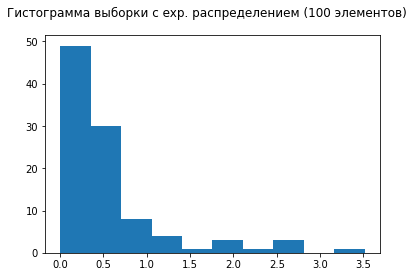

In [20]:
_ = plt.hist(distrib_exp_100)
_ = plt.suptitle('Гистограмма выборки с exp. распределением (100 элементов)')

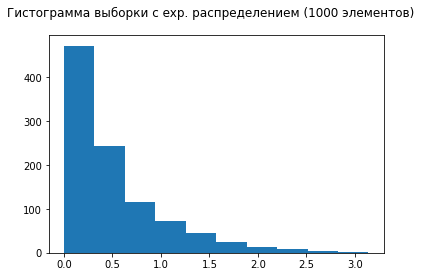

In [21]:
_ = plt.hist(distrib_exp_1000)
_ = plt.suptitle('Гистограмма выборки с exp. распределением (1000 элементов)')

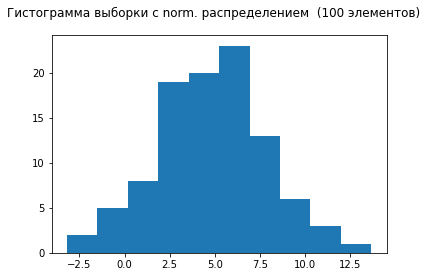

In [22]:
_ = plt.hist(distrib_norm_100)
_ = plt.suptitle('Гистограмма выборки с norm. распределением  (100 элементов)')

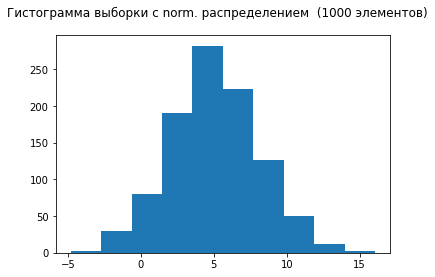

In [23]:
_ = plt.hist(distrib_norm_1000)
_ = plt.suptitle('Гистограмма выборки с norm. распределением  (1000 элементов)')

---
Функции распределения

---

In [24]:
cdf_exp_100 = cdf(distrib_exp_100)
cdf_exp_1000 = cdf(distrib_exp_1000)
cdf_norm_100 = cdf(distrib_norm_100)
cdf_norm_1000 = cdf(distrib_norm_1000)
x_exp = np.arange(0.0, 10.0, 0.05)
cdf_theory_exp = cdf_exp(x_exp, exp_lambda)
x_norm = np.arange(-10.0, 50.0, 0.05)
cdf_theory_norm = [cdf_norm(x, norm_mean, norm_std) for x in x_norm]

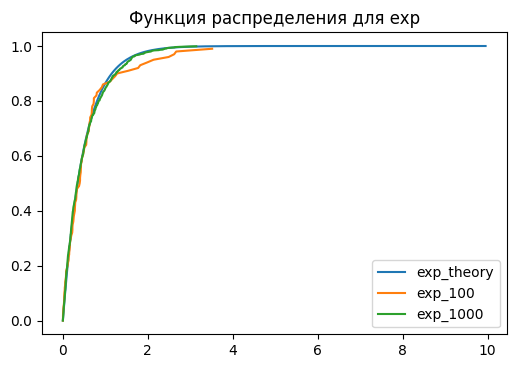

In [25]:
plt.figure(dpi=100)
plt.title("Функция распределения для exp")
plt.plot(x_exp, cdf_theory_exp, label='exp_theory')
plt.plot(cdf_exp_100['x'], cdf_exp_100['y'], label='exp_100')
plt.plot(cdf_exp_1000['x'], cdf_exp_1000['y'], label='exp_1000')
plt.legend()
plt.show()

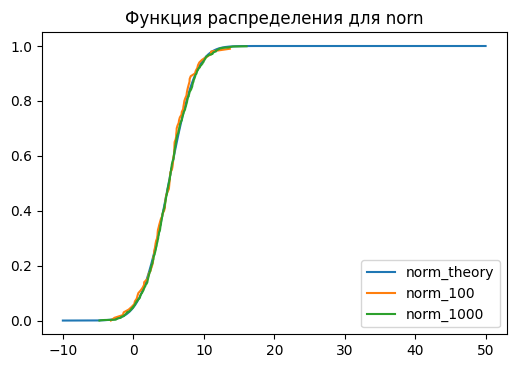

In [26]:
plt.figure(dpi=100)
plt.title("Функция распределения для norn")
plt.plot(x_norm, cdf_theory_norm, label='norm_theory')
plt.plot(cdf_norm_100['x'], cdf_norm_100['y'], label='norm_100')
plt.plot(cdf_norm_1000['x'], cdf_norm_1000['y'], label='norm_1000')
plt.legend()
plt.show()

---
Плотность распределения

---

In [27]:
pdf_exp_100 = pdf(10, distrib_exp_100)
pdf_exp_1000 = pdf(10, distrib_exp_1000)
pdf_norm_100 = pdf(10, distrib_norm_100)
pdf_norm_1000 = pdf(10, distrib_norm_1000)
pdf_theory_exp = pdf_exp(x_exp, exp_lambda)
pdf_theory_norm = [pdf_norm(x, norm_mean, norm_std) for x in x_norm]

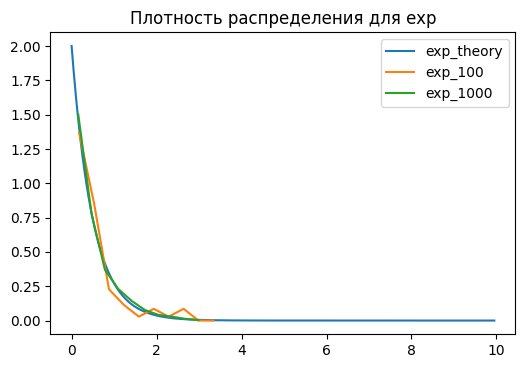

In [28]:
plt.figure(dpi=100)
plt.title("Плотность распределения для exp")
plt.plot(x_exp, pdf_theory_exp, label='exp_theory')
plt.plot(pdf_exp_100['x'], pdf_exp_100['y'], label='exp_100')
plt.plot(pdf_exp_1000['x'], pdf_exp_1000['y'], label='exp_1000')
plt.legend()
plt.show()

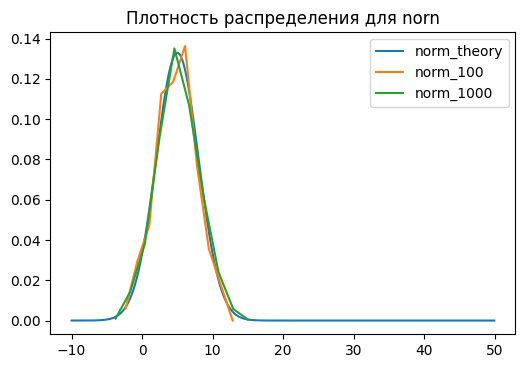

In [29]:
plt.figure(dpi=100)
plt.title("Плотность распределения для norn")
plt.plot(x_norm, pdf_theory_norm, label='norm_theory')
plt.plot(pdf_norm_100['x'], pdf_norm_100['y'], label='norm_100')
plt.plot(pdf_norm_1000['x'], pdf_norm_1000['y'], label='norm_1000')
plt.legend()
plt.show()

**Задание 2.** Сгенерировать три выборки размера 100, 1000 и 10000 для случайных
расстояний между двумя точками, равномерно распределенные в прямоугольнике со
сторонами 10 и 30. Получить среднее значение расстояния между точками, построить
функцию распределения вероятностей и плотности вероятностей случайных
расстояний. Показать разницу между соответствующими функциями на одном
графике.

In [30]:
def distance(x1, x2):
    return math.sqrt((x1[0] - x2[0])**2 + (x1[1] - x2[1])**2)

In [31]:
def distance_generator(N):
    a = 10
    b = 30
    distances = []
    for i in range(N):
        x1 = np.random.uniform(0,a)
        y1 = np.random.uniform(0,b)
        x2 = np.random.uniform(0,a)
        y2 = np.random.uniform(0,b)
        distances.append(distance([x1,y1], [x2,y2]))
    distances.sort()
    return distances

In [32]:
distances_100 = distance_generator(100)
distances_1000 = distance_generator(1000)
distances_10000 = distance_generator(10000)

In [33]:
print("Среднее значение между точками (100): {}".format(np.average(distances_100)))
print("Среднее значение между точками (1000): {}".format(np.average(distances_1000)))
print("Среднее значение между точками (10000): {}".format(np.average(distances_10000)))

Среднее значение между точками (100): 10.792779081321498
Среднее значение между точками (1000): 10.834646693710248
Среднее значение между точками (10000): 11.083552572541413


In [34]:
cdf_dist_100 = cdf(distances_100)
cdf_dist_1000 = cdf(distances_1000)
cdf_dist_10000 = cdf(distances_10000)

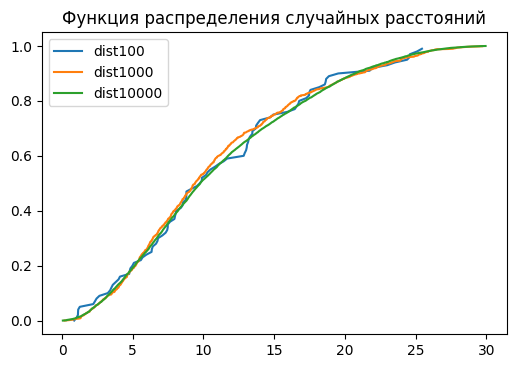

In [35]:
plt.figure(dpi=100)
plt.title("Функция распределения случайных расстояний")
plt.plot(cdf_dist_100['x'], cdf_dist_100['y'], label='dist100')
plt.plot(cdf_dist_1000['x'], cdf_dist_1000['y'], label='dist1000')
plt.plot(cdf_dist_10000['x'], cdf_dist_10000['y'], label='dist10000')
plt.legend()
plt.show()

In [36]:
pdf_dist_100 = pdf(20, distances_100)
pdf_dist_1000 = pdf(20, distances_1000)
pdf_dist_10000 = pdf(20, distances_10000)

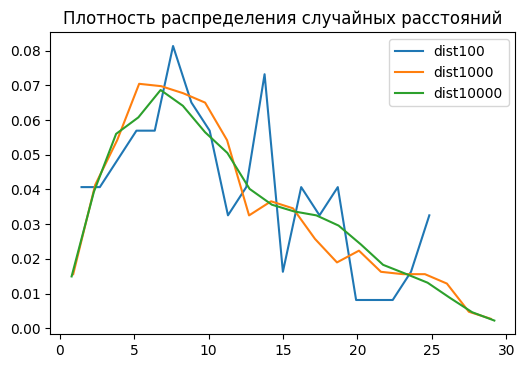

In [37]:
plt.figure(dpi=100)
plt.title("Плотность распределения случайных расстояний")
plt.plot(pdf_dist_100['x'], pdf_dist_100['y'], label='dist100')
plt.plot(pdf_dist_1000['x'], pdf_dist_1000['y'], label='dist1000')
plt.plot(pdf_dist_10000['x'], pdf_dist_10000['y'], label='dist10000')
plt.legend()
plt.show()